In [ ]:
!git clone https://gist.github.com/c1a8c0359fbde2f6dcb92065b8ffc5e3.git

Cloning into 'c1a8c0359fbde2f6dcb92065b8ffc5e3'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt

headlines_df = pd.read_csv("google_headlines.csv")
headlines_df.head(5)

FileNotFoundError: ignored

In [ ]:
### Stock Prices ###

google_price1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Research_Project/Google/google_stock_price_2019.csv')
google_price2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Research_Project/Google/google_stock_price_2020.csv')
google_price3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Research_Project/Google/google_stock_price_2021.csv')

google_stock_price = google_price1.append([google_price2, google_price3])

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

headlines_df['headline_clean'] = headlines_df['headline'].apply(remove_punctuations)

In [ ]:
headlines_df.shape

(2772, 7)

In [ ]:
headlines_sub = headlines_df[headlines_df['date'] > '2019-01-01 00:00:00']

In [ ]:
print(min(headlines_sub['date']))
print(max(headlines_sub['date']))

2019-01-02 00:00:00
2020-05-19 00:00:00


In [ ]:
headlines_sub.shape

(235, 7)

In [ ]:
import numpy as np

headlines_array = np.array(headlines_sub)
np.random.shuffle(headlines_array)
headlines_list = list(headlines_array[:,2])

print(headlines_list)

['Dow Jones Futures Signal Stock Market Gains To Start 2020: Tesla Deliveries Loom; Google, Disney Test Key Support', 'Podcast: Nvidia GTC, Google Stadia, HP And Oculus VR, Apple', 'Podcast: Nvidia GTC, Google Stadia, HP And Oculus VR, Apple', 'Google to Invest EUR 1B to Expand Data Center in Netherlands', 'Dow Jones Futures: Coronavirus Stock Market Rally Stalls On Gilead Remdesivir News; Intel, Google News Hits These Tech Titans', 'Google ETFs Gain Despite Mixed Earnings Amid Coronavirus Crisis', 'FOMO Rally: Time For Catch-Up Trades; Analyzing Google And 3 Others', "Auto Stock Roundup: Ford's Europe Electric Plans, General Motors' Deal With Google", 'Dow Jones Futures: Google, AMD Lead Earnings Movers Late After Coronavirus Stock Market Rally Has Growing Pains', 'Wall Street Breakfast: End Of An Era At Google', 'Google eyes $600M Minnesota data center powered by Xcel Energy wind farms', 'HCA Healthcare, Google Cloud Tie Up Amid Coronavirus Woes', 'Dow Jones Futures: Google Dives Bel

In [ ]:
!pip install transformers

#Getting the tokenizer and the model

from transformers import AutoTokenizer, AutoModelForSequenceClassification
  
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 54 kB/s 
     |████████████████████████████████| 67 kB 108 kB/s 
     |████████████████████████████████| 895 kB 343 kB/s 
     |████████████████████████████████| 6.5 MB 185 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:11<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:06<?, ?B/s]

In [ ]:
#That's where the headlines get tokenized to be inputted into model

inputs = tokenizer(headlines_list, padding = True, truncation = True, return_tensors='pt')
print(inputs)

In [ ]:
#inference

outputs = model(**inputs)
print(outputs.logits.shape)

In [ ]:
#Postprocessing with softmax

import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

In [ ]:
#Model classes

model.config.id2label

In [ ]:
#Formatting the results as a pandas data frame

import pandas as pd

#Headline #Positive #Negative #Neutral
positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()
date = headlines_sub['date'].tolist()

table = {'Headline':headlines_list,
         "Positive":positive,
         "Negative":negative, 
         "Neutral":neutral,
         "date": date}
      
df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral","date"])

df.head(5)



,Headline,Positive,Negative,Neutral,date
0,"Manufacturing, Jobs, Google Q4 Data On Deck",0.024670,0.060787,0.914542,2020-01-25 00:00:00
1,"Podcast: Google Cloud Next, Qualcomm AI Day",0.029493,0.036435,0.934072,2020-04-01 00:00:00
2,Wall Street Breakfast: End Of An Era At Google,0.050741,0.092645,0.856613,2020-04-07 00:00:00
3,"Intel, Google lawyers head to Senate",0.024907,0.036850,0.938244,2020-04-28 00:00:00
4,FOMO Rally: Time For Catch-Up Trades; Analyzin...,0.064380,0.015382,0.920237,2019-06-30 00:00:00


In [ ]:
df_melt = df.melt(id_vars=["Headline","date"], 
        var_name="Sentiment", 
        value_name="Sent_score")

In [ ]:
df_melt.head()

,Headline,date,Sentiment,Sent_score
0,"Manufacturing, Jobs, Google Q4 Data On Deck",2020-01-25 00:00:00,Positive,0.024670
1,"Podcast: Google Cloud Next, Qualcomm AI Day",2020-04-01 00:00:00,Positive,0.029493
2,Wall Street Breakfast: End Of An Era At Google,2020-04-07 00:00:00,Positive,0.050741
3,"Intel, Google lawyers head to Senate",2020-04-28 00:00:00,Positive,0.024907
4,FOMO Rally: Time For Catch-Up Trades; Analyzin...,2019-06-30 00:00:00,Positive,0.064380


In [ ]:
sent_date = df_melt.groupby(["date","Sentiment"])["Sent_score"].mean().to_frame().reset_index()

sent_date.head()

,date,Sentiment,Sent_score
0,2019-01-02 00:00:00,Negative,0.443985
1,2019-01-02 00:00:00,Neutral,0.527145
2,2019-01-02 00:00:00,Positive,0.028870
3,2019-01-08 00:00:00,Negative,0.200635
4,2019-01-08 00:00:00,Neutral,0.554366


In [ ]:
sent_score = sent_date.pivot_table('Sent_score', ['date'], 'Sentiment').reset_index()

In [ ]:
sent_score['max_score'] = sent_score[["Negative", "Neutral","Positive"]].max(axis=1)
sent_score['date']= pd.to_datetime(sent_score['date'])
sent_score['date'] = sent_score['date'].dt.strftime('%Y-%m-%d')
sent_score.head()

Sentiment,date,Negative,Neutral,Positive,max_score
0,2019-01-02,0.443985,0.527145,0.028870,0.527145
1,2019-01-08,0.200635,0.554366,0.244999,0.554366
2,2019-01-09,0.021074,0.793235,0.185691,0.793235
3,2019-01-11,0.010785,0.931684,0.057530,0.931684
4,2019-01-14,0.017464,0.942217,0.040319,0.942217


In [ ]:
scores = sent_score[["Negative", "Neutral","Positive"]]
scores['max_sentiment'] = scores.idxmax(axis=1)
scores = scores[['max_sentiment']]
final_sent_data = pd.concat([sent_score, scores], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
final_sent_data.head()

Sentiment,date,Negative,Neutral,Positive,max_score,max_sentiment
0,2019-01-02,0.443985,0.527145,0.028870,0.527145,Neutral
1,2019-01-08,0.200635,0.554366,0.244999,0.554366,Neutral
2,2019-01-09,0.021074,0.793235,0.185691,0.793235,Neutral
3,2019-01-11,0.010785,0.931684,0.057530,0.931684,Neutral
4,2019-01-14,0.017464,0.942217,0.040319,0.942217,Neutral


In [ ]:
sentiment_ts = final_sent_data[['date','max_score']]

In [ ]:
google_stock_price['Date']= pd.to_datetime(google_stock_price['Date'])
google_stock_price['Date'] = google_stock_price['Date'].dt.strftime('%Y-%m-%d')
google_stock_price.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,"1,330.11","1,338.00","1,329.09","1,337.02","962,468"
1,2019-12-30,"1,350.00","1,353.00","1,334.02","1,336.14","1,051,323"
2,2019-12-27,"1,362.99","1,364.53","1,349.31","1,351.89","1,038,718"
3,2019-12-26,"1,346.17","1,361.33","1,344.47","1,360.40","667,754"
4,2019-12-24,"1,348.50","1,350.26","1,342.78","1,343.56","347,518"


In [ ]:
### Stock price data ###

google_stock_price_sub = google_stock_price[google_stock_price['Date'].between(min(headlines_sub['date']), max(headlines_sub['date']))]
google_stock_price_sub.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,"1,330.11","1,338.00","1,329.09","1,337.02","962,468"
1,2019-12-30,"1,350.00","1,353.00","1,334.02","1,336.14","1,051,323"
2,2019-12-27,"1,362.99","1,364.53","1,349.31","1,351.89","1,038,718"
3,2019-12-26,"1,346.17","1,361.33","1,344.47","1,360.40","667,754"
4,2019-12-24,"1,348.50","1,350.26","1,342.78","1,343.56","347,518"


In [ ]:
merge_price = pd.merge(google_stock_price_sub,sentiment_ts,how = 'left', left_on = "Date", right_on = "date")
merge_price = merge_price[['Date','Close','max_score']]

merge_price['Date']= pd.to_datetime(merge_price['Date'])
merge_price['year'] = merge_price['Date'].dt.strftime('%Y')
merge_price.head(10)

,Date,Close,max_score,year
0,2019-12-31,"1,337.02",NaN,2019
1,2019-12-30,"1,336.14",NaN,2019
2,2019-12-27,"1,351.89",NaN,2019
3,2019-12-26,"1,360.40",NaN,2019
4,2019-12-24,"1,343.56",0.599130,2019
5,2019-12-23,"1,348.84",NaN,2019
6,2019-12-20,"1,349.59",NaN,2019
7,2019-12-19,"1,356.04",NaN,2019
8,2019-12-18,"1,352.62",NaN,2019
9,2019-12-17,"1,355.12",0.917894,2019


In [ ]:
print(min(merge_price['Date']))
print(max(merge_price['Date']))

2019-01-03 00:00:00
2020-05-19 00:00:00


In [ ]:
print(min(sentiment_ts['date']))
print(max(sentiment_ts['date']))

2019-01-02
2020-05-19


In [ ]:
print(len(merge_price['Date'].unique()))
print(merge_price.shape[0])

347
347


In [ ]:
dt = pd.date_range(min(merge_price['Date']),max(merge_price['Date']),freq='d').to_list()
dt = pd.DataFrame(dt, columns = ['Date'])


In [ ]:
dt = pd.merge(dt,merge_price,how = 'left', left_on = "Date", right_on = "Date")

In [ ]:
dt.head(100)

,Date,Close,max_score,year
0,2019-01-03,"1,016.06",NaN,2019
1,2019-01-04,"1,070.71",NaN,2019
2,2019-01-05,NaN,NaN,NaN
3,2019-01-06,NaN,NaN,NaN
4,2019-01-07,"1,068.39",NaN,2019
...,...,...,...,...
95,2019-04-08,"1,203.84",0.835103,2019
96,2019-04-09,"1,197.25",0.821722,2019
97,2019-04-10,"1,202.16",0.856613,2019
98,2019-04-11,"1,204.62",NaN,2019


In [ ]:
#dt['Close'][dt['Close'] == np.nan] = None
#dt['Close'] = dt['Close'].astype(float)
dt['max_score'] = pd.to_numeric(dt['max_score'], errors='coerce')
dt['Close'] = dt['Close'].str.replace(',','')
dt['Close'] = pd.to_numeric(dt['Close'], errors='coerce')
dt['Close'] = dt['Close'].interpolate(method='linear')
dt['max_score'] = dt['max_score'].interpolate(method='linear')

dt = dt[dt['max_score'].notna()]

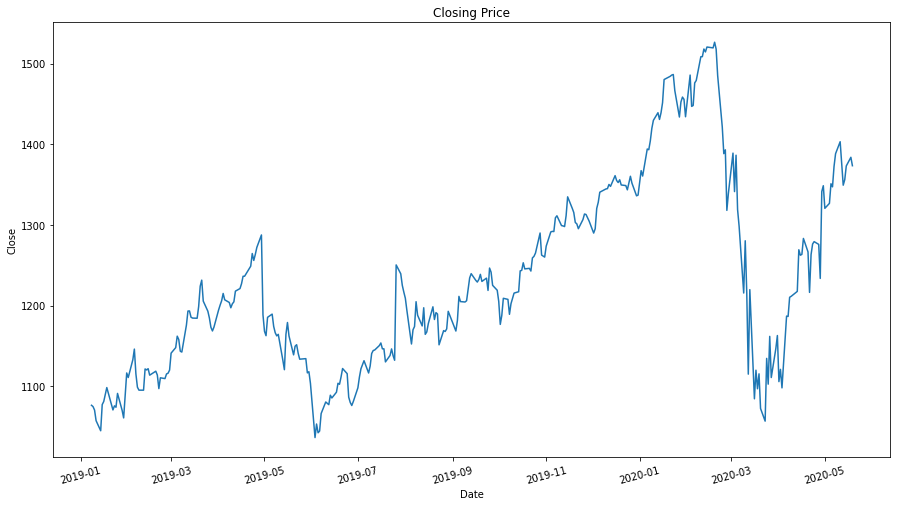

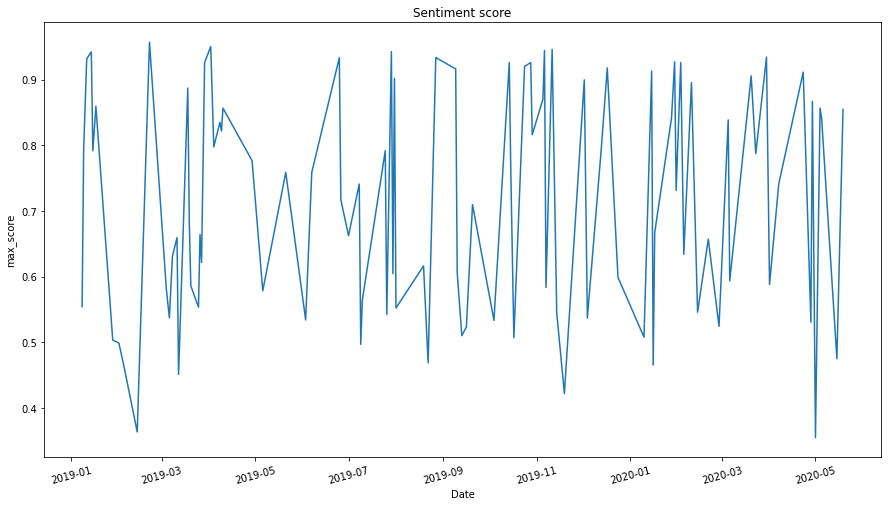

In [ ]:
import seaborn as sns


# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(15,8))
    sns.lineplot(x, y, data=df)
    plt.xticks(rotation=15)
    plt.title(title)
    plt.show()

plot_df(dt, x=dt.Date, y=dt.Close, title='Closing Price')   
plot_df(dt, x=dt.Date, y=dt.max_score,title='Sentiment score')


In [ ]:
### Check stationarity of time series

from statsmodels.tsa.stattools import adfuller

result = adfuller(dt['Close'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Close is not stationary")
else:
    print("Close is stationary")


result = adfuller(dt['max_score'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("max_score is not stationary")
else:
    print("max_score is stationary")



Test Statistics: -2.380067646328482
p-value: 0.14744137415163072
critical_values: {'1%': -3.4439333076538854, '5%': -2.8675301216074414, '10%': -2.56996050355167}
Close is not stationary
Test Statistics: -6.5274588439749275
p-value: 1.0062754235695422e-08
critical_values: {'1%': -3.4436298692815304, '5%': -2.867396599893435, '10%': -2.5698893429241916}
max_score is stationary


In [ ]:
### Differencing to make it stationary
dt = dt.drop('year',axis =1)
dt_transformed = dt.diff(2).dropna()

In [ ]:
### Check stationarity of time series

from statsmodels.tsa.stattools import adfuller

result = adfuller(dt_transformed['Close'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Close is not stationary")
else:
    print("Close is stationary")


result = adfuller(dt_transformed['max_score'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("max_score is not stationary")
else:
    print("max_score is stationary")

Test Statistics: -4.166684614281857
p-value: 0.0007498856365183168
critical_values: {'1%': -3.444133731419755, '5%': -2.8676183066831036, '10%': -2.5700075029117166}
Close is stationary
Test Statistics: -8.053920498877053
p-value: 1.7126652712583827e-12
critical_values: {'1%': -3.4439333076538854, '5%': -2.8675301216074414, '10%': -2.56996050355167}
max_score is stationary


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(dt_transformed[['max_score','Close']], maxlag=40)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1168  , p=0.7326  , df_denom=492, df_num=1
ssr based chi2 test:   chi2=0.1175  , p=0.7317  , df=1
likelihood ratio test: chi2=0.1175  , p=0.7317  , df=1
parameter F test:         F=0.1168  , p=0.7326  , df_denom=492, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2596  , p=0.7715  , df_denom=489, df_num=2
ssr based chi2 test:   chi2=0.5245  , p=0.7693  , df=2
likelihood ratio test: chi2=0.5242  , p=0.7694  , df=2
parameter F test:         F=0.2596  , p=0.7715  , df_denom=489, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2258  , p=0.8785  , df_denom=486, df_num=3
ssr based chi2 test:   chi2=0.6871  , p=0.8762  , df=3
likelihood ratio test: chi2=0.6866  , p=0.8764  , df=3
parameter F test:         F=0.2258  , p=0.8785  , df_denom=486, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1738  , p=0.9518  

{1: ({'lrtest': (0.11753051850746488, 0.7317284296871516, 1),
   'params_ftest': (0.11683208182133473, 0.732642025241873, 492.0, 1.0),
   'ssr_chi2test': (0.11754447256425536, 0.7317131188339343, 1),
   'ssr_ftest': (0.11683208182144168, 0.7326420252417527, 492.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.524242988390597, 0.7694175382640615, 2),
   'params_ftest': (0.25960616798061287, 0.7714615529039722, 489.0, 2.0),
   'ssr_chi2test': (0.5245212555520653, 0.7693104938937891, 2),
   'ssr_ftest': (0.25960616798072866, 0.7714615529038675, 489.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (0.6865840042137279, 0.876354898252151, 3),
   'params_ftest': (0.22576895612517292, 0.878475722837309, 486.0, 3.0),
   'ssr_chi2test': (0.687062317098643, 0.8762427215021714, 3),
   'ssr_ftest': (0.2257689561257204, 0.8784757228369168, 486.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.